In [1]:
# Importing the required liabraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
crop = pd.read_csv("C:/harika masters/Anaconda/Crop_recommendation.csv")

crop.head(20)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [4]:
crop.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [5]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
crop.shape

(2200, 8)

In [7]:
# To check whether there null values
crop.apply(lambda x: len(x.isnull()))

N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

In [8]:
# To check wether there null values or not using the useful function Assert 
assert crop.isnull().sum().sum() == 0

In [9]:
# Eliminating all duplicated rows with drop_duplicates
crop.drop_duplicates(inplace= True)

In [10]:
# To check whether there duplicated values or not using the useful function Assert 
assert crop.duplicated().sum() == 0

In [11]:
# To check whether there unique values in Dataset
crop.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [12]:
# all of the values in the label are unique 
print(crop['label'].unique())
print(" " , len(crop['label'].unique()))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
  22


In [13]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [14]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [15]:
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Now you can use StandardScaler in your code
scaler = StandardScaler()


# Creating a copy of the dataset to avoid modifying the original dataset
crop_data_encoded = crop.copy()

# Applying label encoding to the 'label' column
label_encoder = LabelEncoder()
crop_data_encoded['label'] = label_encoder.fit_transform(crop_data_encoded['label'])

# Applying standardization to the feature columns
scaler = StandardScaler()
crop_data_encoded[numerical_cols] = scaler.fit_transform(crop_data_encoded[numerical_cols])

# Displaying the first few rows of the modified dataset
crop_data_encoded.tail(20)


,N,P,K,temperature,humidity,ph,rainfall,label
2180,0.797860,-1.072300,-0.338671,-0.313420,-0.567551,1.077274,0.568136,5
2181,1.366828,-0.678103,-0.437414,0.215844,-0.079517,0.506299,1.008214,5
2182,1.421016,-0.617457,-0.299174,0.217463,-0.942564,0.855503,0.424850,5
2183,1.150079,-0.829717,-0.417666,-0.202226,-0.674498,1.058119,0.623172,5
2184,1.448109,-0.556811,-0.397917,0.374080,-0.935134,0.664613,0.737669,5
2185,1.773234,-0.526488,-0.457163,0.387594,-0.582083,-0.384343,0.968542,5
2186,1.529390,-0.465842,-0.378168,0.204332,-0.625139,-0.152887,0.757862,5
2187,1.366828,-0.617457,-0.299174,0.267900,-0.425155,0.567605,0.717022,5
2188,1.529390,-0.678103,-0.338671,-0.482953,-0.831285,0.383457,0.903735,5
2189,1.312641,-1.132946,-0.358420,-0.412777,-0.271281,-0.099111,1.505284,5


# Visualizations

In [17]:
import warnings

# Suppress FutureWarning related to is_categorical_dtype
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")

# Your code here
# ...

# Reset the warning filter to its default state after your code if needed
# warnings.resetwarnings()


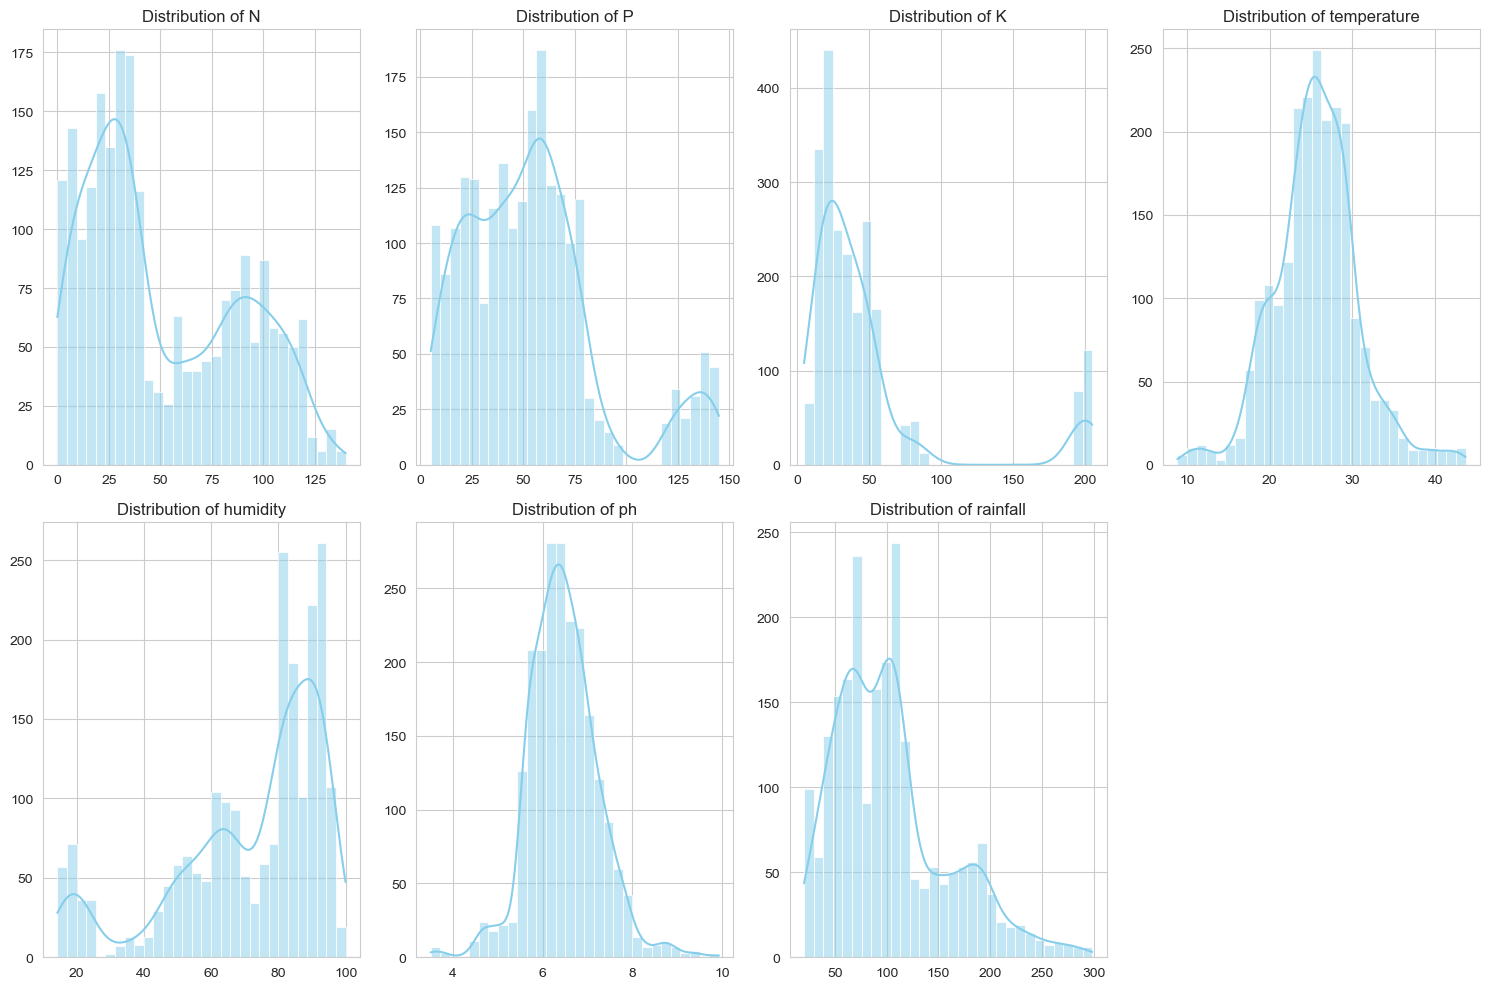

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating histograms for each numerical column
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Creating a figure object
plt.figure(figsize=(15, 10))

# Creating subplots for each numerical column
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(crop[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel('')
    plt.ylabel('')

# Adjusting the layout
plt.tight_layout()

# Suppressing FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.show()


In [19]:


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Label Encoding the 'label' column
le = LabelEncoder()
crop['label'] = le.fit_transform(crop['label'])

# Separating the features and target variable
X = crop.drop('label', axis=1)
y = crop['label']

# Normalizing the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


In [20]:
# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Building the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=100, random_state=42)
log_reg_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = log_reg_model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9204545454545454

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Making predictions on the testing set
y_pred = log_reg_model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate ROC-AUC
y_pred_proba = log_reg_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.9204545454545454
Precision: 0.9357849631440623
Recall: 0.9204545454545454
F1 Score: 0.9192615649641703
ROC-AUC: 0.996838969427693


### Using hyperparameter tuning for logistic regression model.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a Logistic Regression model instance with increased max_iter
log_reg_model_tuned = LogisticRegression(max_iter=1000, random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(log_reg_model_tuned, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build the Logistic Regression model with the best hyperparameters
log_reg_model_best = LogisticRegression(**best_params, max_iter=1000, random_state=42)
log_reg_model_best.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_best = log_reg_model_best.predict(X_test)

# Calculate the accuracy of the model with hyperparameter tuning
accuracy_best = accuracy_score(y_test, y_pred_best)
accuracy_best


Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = 

0.9704545454545455

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the testing set
y_pred_best = log_reg_model_best.predict(X_test)

# Calculate the metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_score_best = f1_score(y_test, y_pred_best, average='weighted')

# Calculate ROC-AUC
y_pred_proba = log_reg_model_best.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Print metrics
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_score_best)
print("ROC-AUC:", roc_auc)


Accuracy: 0.9704545454545455
Precision: 0.9714488126252832
Recall: 0.9704545454545455
F1 Score: 0.9703157079390923
ROC-AUC: 0.9997385005921756


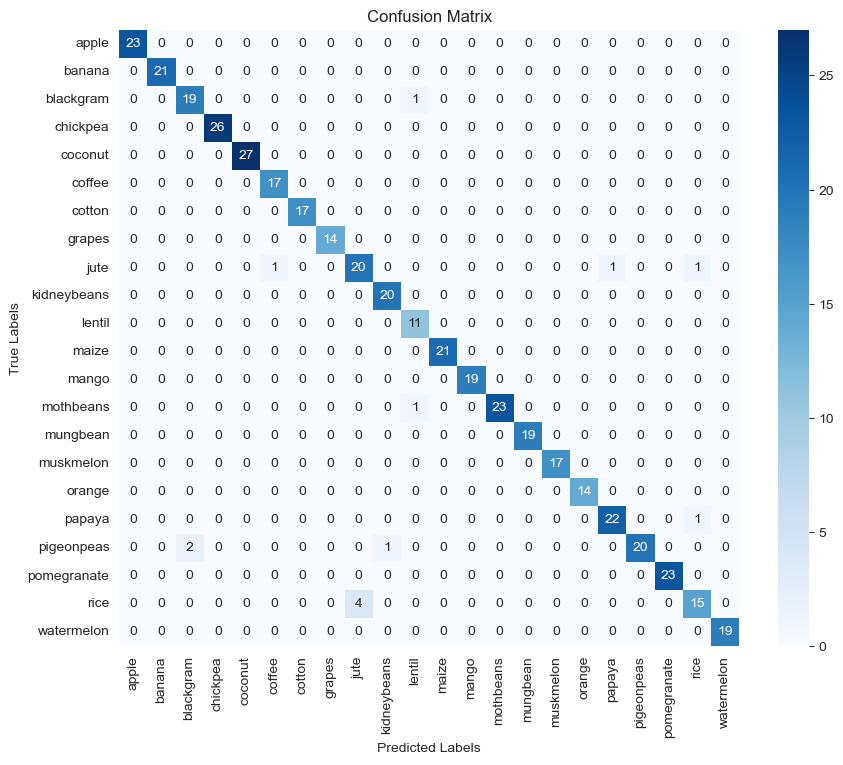

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Creating a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)

# Creating a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Building the Random Forest Classifier model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_rf = random_forest_model.predict(X_test)

# Calculating the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf


0.9931818181818182

### Using hyperparameter tuning for Random forest model.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier instance
random_forest_model_tuned = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(random_forest_model_tuned, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build the Random Forest Classifier with the best hyperparameters
random_forest_model_best = RandomForestClassifier(**best_params, random_state=42)
random_forest_model_best.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf_best = random_forest_model_best.predict(X_test)

# Calculate the metrics
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best, average='weighted')
recall_rf_best = recall_score(y_test, y_pred_rf_best, average='weighted')
f1_score_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')

# Calculate ROC-AUC
y_pred_proba = random_forest_model_best.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Print metrics
print("Accuracy:", accuracy_rf_best)
print("Precision:", precision_rf_best)
print("Recall:", recall_rf_best)
print("F1 Score:", f1_score_rf_best)
print("ROC-AUC:", roc_auc)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Accuracy: 0.9931818181818182
Precision: 0.9937348484848485
Recall: 0.9931818181818182
F1 Score: 0.9931754816901672
ROC-AUC: 0.9999208815590911


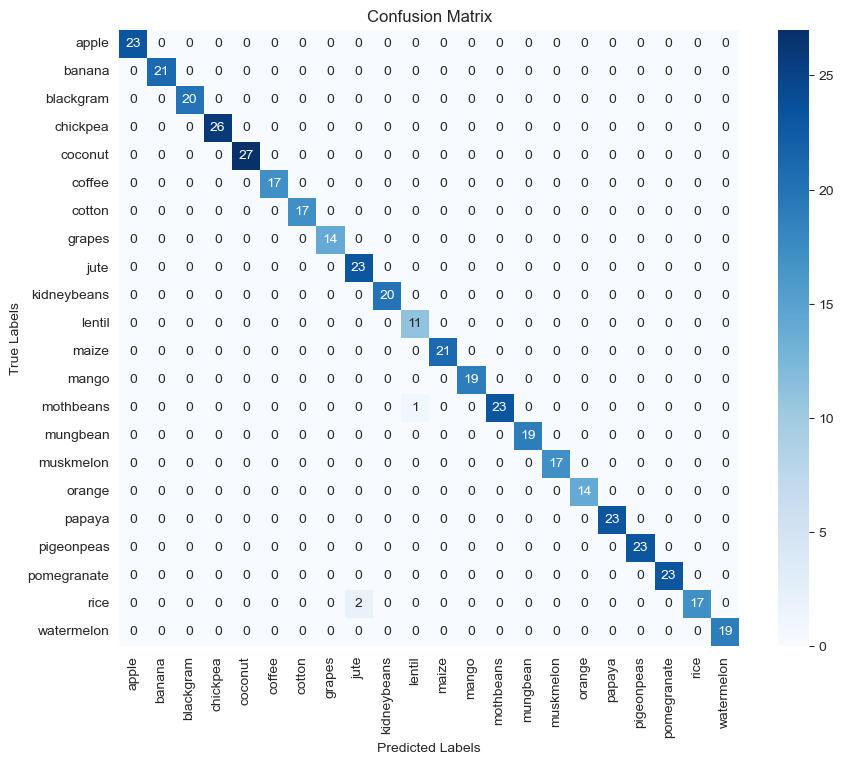

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf_best)

# Creating a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)

# Creating a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



### Decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Building the Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_dt = decision_tree_model.predict(X_test)

# Calculating the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt


0.9863636363636363

### Using hyperparameter tuning for decision tree model.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier instance
decision_tree_model_tuned = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(decision_tree_model_tuned, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build the Decision Tree Classifier with the best hyperparameters
decision_tree_model_best = DecisionTreeClassifier(**best_params, random_state=42)
decision_tree_model_best.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_dt_best = decision_tree_model_best.predict(X_test)

# Calculate the accuracy of the model with hyperparameter tuning
accuracy_dt_best = accuracy_score(y_test, y_pred_dt_best)
accuracy_dt_best


Fitting 5 folds for each of 72 candidates, totalling 360 fits


0.9863636363636363

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the testing set
y_pred_dt_best = decision_tree_model_best.predict(X_test)

# Calculate the metrics
accuracy_dt_best = accuracy_score(y_test, y_pred_dt_best)
precision_dt_best = precision_score(y_test, y_pred_dt_best, average='weighted')
recall_dt_best = recall_score(y_test, y_pred_dt_best, average='weighted')
f1_score_dt_best = f1_score(y_test, y_pred_dt_best, average='weighted')

# For Decision Trees, ROC-AUC is not applicable as they are not probabilistic classifiers

# Print metrics
print("Accuracy:", accuracy_dt_best)
print("Precision:", precision_dt_best)
print("Recall:", recall_dt_best)
print("F1 Score:", f1_score_dt_best)


Accuracy: 0.9863636363636363
Precision: 0.9868055555555556
Recall: 0.9863636363636363
F1 Score: 0.9863152866630287


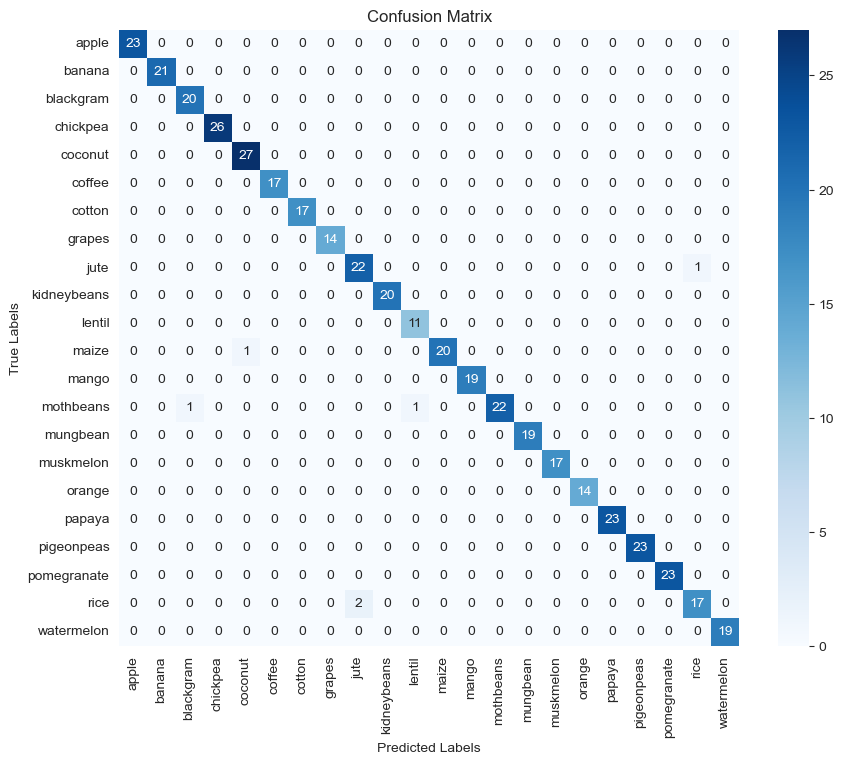

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt_best)

# Creating a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)

# Creating a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



### Support vector machine

In [32]:
from sklearn.svm import SVC

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Building the Support Vector Machine (SVM) Classifier model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_svm = svm_model.predict(X_test)

# Calculating the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm


0.9681818181818181

### Using hyperparameter tuning for SVM model.

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

# Create an SVM Classifier instance
svm_model_tuned = SVC(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_model_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build the SVM Classifier with the best hyperparameters
svm_model_best = SVC(**best_params, random_state=42)
svm_model_best.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm_best = svm_model_best.predict(X_test)

# Calculate the accuracy of the model with hyperparameter tuning
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
accuracy_svm_best


0.9818181818181818

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

# Create an SVM Classifier instance
svm_model_tuned = SVC(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_model_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build the SVM Classifier with the best hyperparameters
svm_model_best = SVC(**best_params, random_state=42)
svm_model_best.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm_best = svm_model_best.predict(X_test)

# Calculate the metrics
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
precision_svm_best = precision_score(y_test, y_pred_svm_best, average='weighted')
recall_svm_best = recall_score(y_test, y_pred_svm_best, average='weighted')
f1_score_svm_best = f1_score(y_test, y_pred_svm_best, average='weighted')



# Print metrics
print("Accuracy:", accuracy_svm_best)
print("Precision:", precision_svm_best)
print("Recall:", recall_svm_best)
print("F1 Score:", f1_score_svm_best)


Accuracy: 0.9818181818181818
Precision: 0.9826703908836262
Recall: 0.9818181818181818
F1 Score: 0.9818671829886643


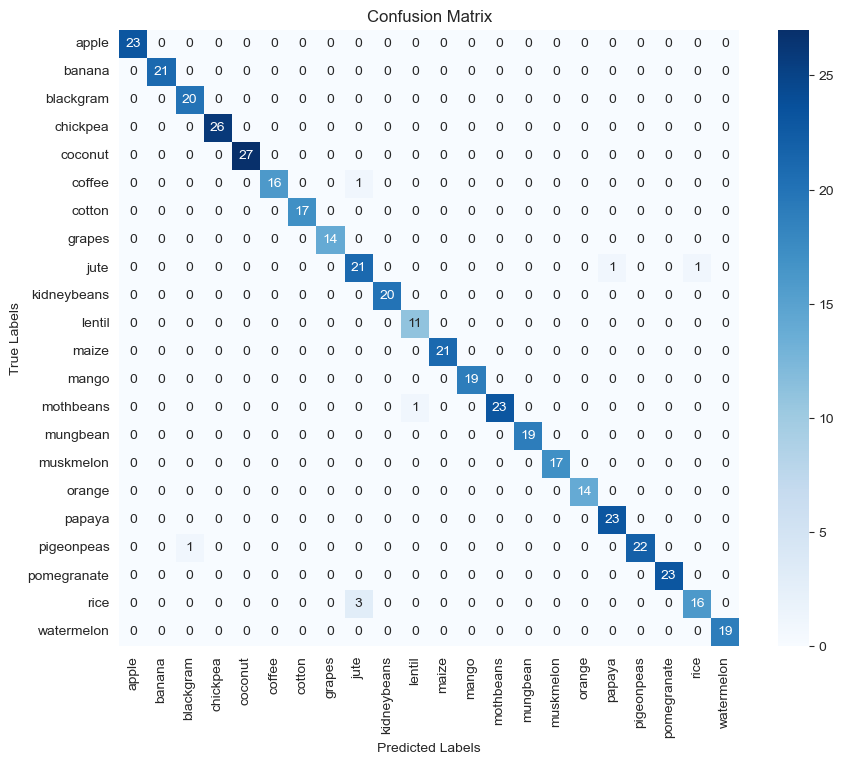

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm_best)

# Creating a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)

# Creating a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



### K-Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Building the K-Nearest Neighbors (KNN) Classifier model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_knn = knn_model.predict(X_test)

# Calculating the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn


0.9681818181818181

### Using hyperparameter tuning for K-Nearest Neighbors model.

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Create a K-Nearest Neighbors (KNN) model instance
knn_model_tuned = KNeighborsClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build the KNN model with the best hyperparameters
knn_model_best = KNeighborsClassifier(**best_params)
knn_model_best.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_knn_best = knn_model_best.predict(X_test)

# Calculate the accuracy of the model with hyperparameter tuning
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
accuracy_knn_best


0.975

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the testing set
y_pred_knn_best = knn_model_best.predict(X_test)

# Calculate the metrics
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
precision_knn_best = precision_score(y_test, y_pred_knn_best, average='weighted')
recall_knn_best = recall_score(y_test, y_pred_knn_best, average='weighted')
f1_knn_best = f1_score(y_test, y_pred_knn_best, average='weighted')

# Calculate ROC-AUC (if applicable)
try:
    # If binary classification, use 'ovr', else 'ovo'
    multi_class_roc_auc = 'ovr' if len(set(y_test)) == 2 else 'ovo'
    
    y_pred_proba_knn = knn_model_best.predict_proba(X_test)
    roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class=multi_class_roc_auc)
    print("ROC-AUC:", roc_auc_knn)
except AttributeError:
    print("ROC-AUC cannot be calculated for KNN as it does not support probability estimates.")

# Print metrics
print("Accuracy:", accuracy_knn_best)
print("Precision:", precision_knn_best)
print("Recall:", recall_knn_best)
print("F1 Score:", f1_knn_best)


ROC-AUC: 0.9921201843541659
Accuracy: 0.975
Precision: 0.9791842669115397
Recall: 0.975
F1 Score: 0.9751712865338037


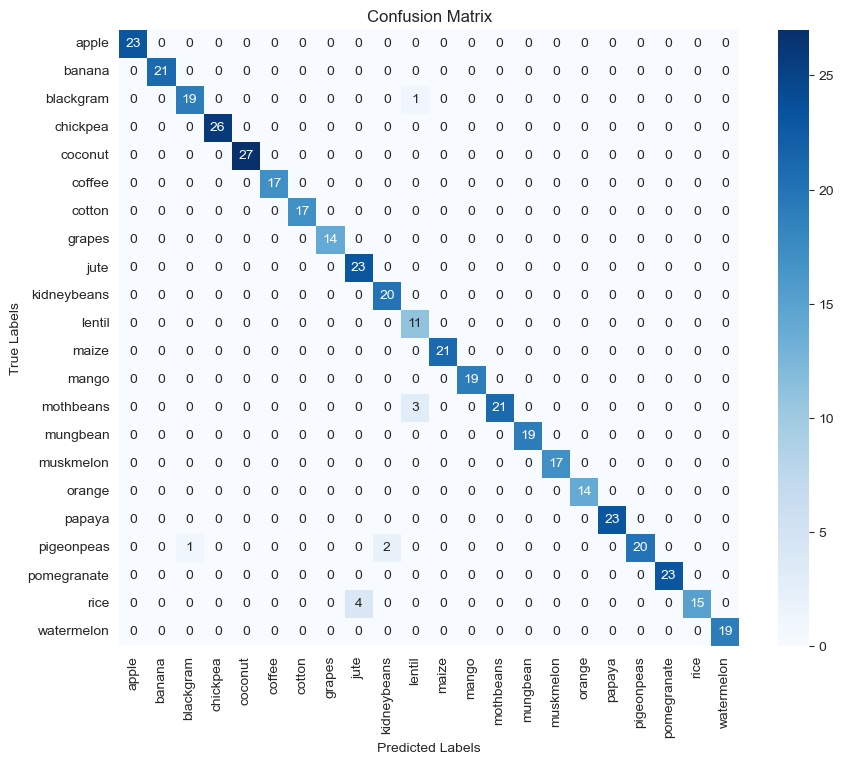

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn_best)

# Creating a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)

# Creating a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



### Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Building the Gaussian Naive Bayes Classifier model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Calculating the accuracy of the model
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
accuracy_naive_bayes


0.9954545454545455

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Building the Gaussian Naive Bayes Classifier model
naive_bayes_model = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(naive_bayes_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build the Gaussian Naive Bayes Classifier model with the best hyperparameters
naive_bayes_model_best = GaussianNB(**best_params)
naive_bayes_model_best.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_naive_bayes_best = naive_bayes_model_best.predict(X_test)

# Calculate the accuracy of the model with hyperparameter tuning
accuracy_naive_bayes_best = accuracy_score(y_test, y_pred_naive_bayes_best)
accuracy_naive_bayes_best


Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.9954545454545455

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the testing set
y_pred_naive_bayes_best = naive_bayes_model_best.predict(X_test)

# Calculate the accuracy of the model with hyperparameter tuning
accuracy_naive_bayes_best = accuracy_score(y_test, y_pred_naive_bayes_best)

# Calculate precision, recall, F1 Score, and ROC-AUC
precision_naive_bayes_best = precision_score(y_test, y_pred_naive_bayes_best, average='weighted')
recall_naive_bayes_best = recall_score(y_test, y_pred_naive_bayes_best, average='weighted')
f1_score_naive_bayes_best = f1_score(y_test, y_pred_naive_bayes_best, average='weighted')

# Calculate ROC-AUC
y_pred_proba_naive_bayes_best = naive_bayes_model_best.predict_proba(X_test)
roc_auc_naive_bayes_best = roc_auc_score(y_test, y_pred_proba_naive_bayes_best, multi_class='ovr')

# Print the metrics
print("Accuracy:", accuracy_naive_bayes_best)
print("Precision:", precision_naive_bayes_best)
print("Recall:", recall_naive_bayes_best)
print("F1 Score:", f1_score_naive_bayes_best)
print("ROC-AUC:", roc_auc_naive_bayes_best)


Accuracy: 0.9954545454545455
Precision: 0.9958181818181817
Recall: 0.9954545454545455
F1 Score: 0.9954229797979799
ROC-AUC: 0.9999905214168585


### Using hyperparameter tuning for Naive Bayes model.

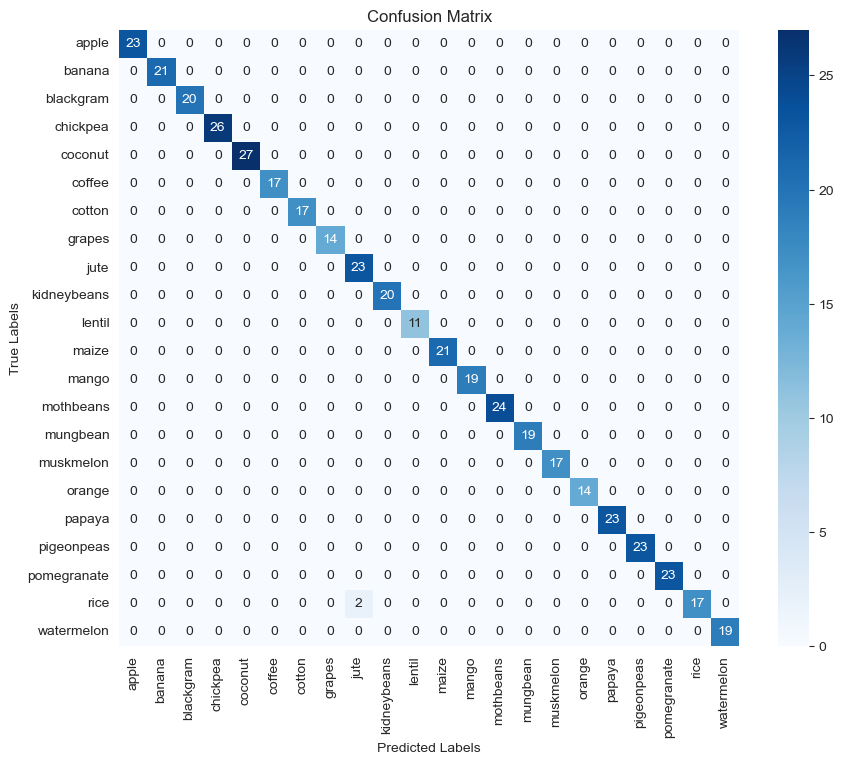

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_naive_bayes_best)

# Creating a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)

# Creating a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



### Linear Discriminant Analysis (LDA)

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Building the Linear Discriminant Analysis (LDA) Classifier model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_lda = lda_model.predict(X_test)

# Calculating the accuracy of the model
accuracy_lda = accuracy_score(y_test, y_pred_lda)
accuracy_lda


0.9431818181818182

### Using hyperparameter tuning for Linear Discriminant analysis(LDA)

In [47]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
}

# Create an LDA classifier
lda = LinearDiscriminantAnalysis()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_lda = grid_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred_best_lda = best_lda.predict(X_test)

# Calculate the accuracy of the best model
accuracy_best_lda = accuracy_score(y_test, y_pred_best_lda)
accuracy_best_lda


C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py", line 621, in fit
    raise NotImp

0.9431818181818182

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Make predictions on the testing set with the best model
y_pred_best_lda = best_lda.predict(X_test)

# Calculate the accuracy of the best model
accuracy_best_lda = accuracy_score(y_test, y_pred_best_lda)

# Calculate precision, recall, F1 Score, and ROC-AUC
precision_best_lda = precision_score(y_test, y_pred_best_lda, average='weighted')
recall_best_lda = recall_score(y_test, y_pred_best_lda, average='weighted')
f1_score_best_lda = f1_score(y_test, y_pred_best_lda, average='weighted')
roc_auc_best_lda = roc_auc_score(y_test, best_lda.predict_proba(X_test), multi_class='ovr')

# Print the metrics
print("Accuracy:", accuracy_best_lda)
print("Precision:", precision_best_lda)
print("Recall:", recall_best_lda)
print("F1 Score:", f1_score_best_lda)
print("ROC-AUC:", roc_auc_best_lda)


Accuracy: 0.9431818181818182
Precision: 0.9528573943074932
Recall: 0.9431818181818182
F1 Score: 0.9425887292530225
ROC-AUC: 0.9991617174163728


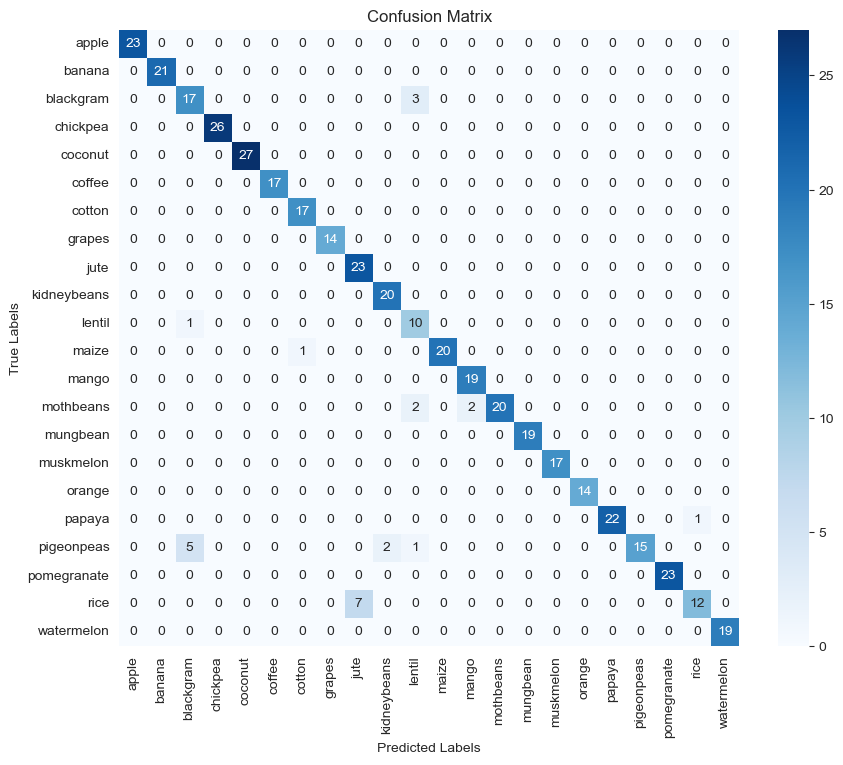

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_lda)

# Creating a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)

# Creating a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

